In [2]:
using WignerSymbols, SphericalHarmonics
using Plots; gr(); theme(:vibrant);
using Printf
using DataFrames
using LinearAlgebra
using Luxor
ENV["COLUMNS"]=200;

# Crystal field theory
    
    In this exercise ...

In [3]:
include("./CF_functions.jl");

## Example: Metal-ion in a cubic field
        
Bellow you will find the example use of this notebook. 

### Creating the complex:
The positions of ligands in spherical coordinates have to be specified in arrays `ligands_θ` and `ligands_ϕ`, we assume that the distance to the metal ion is the same for all the ligands.
    
Geometry of cubic complex is demonstrated bellow:


    

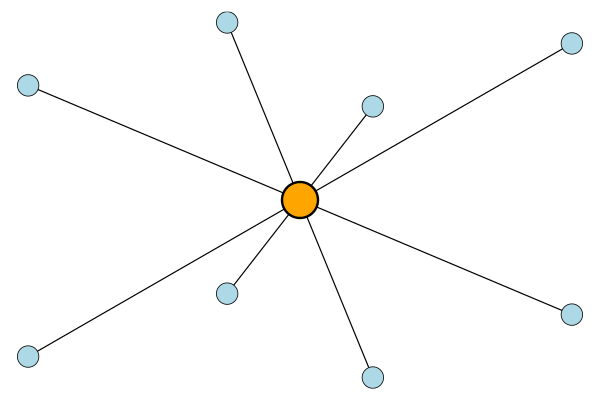

In [4]:
ligands_θ = [ pi/4, pi/4, pi/4, pi/4, pi*3/4, pi*3/4, pi*3/4, pi*3/4 ];
ligands_ϕ = [ pi/4, pi*3/4, pi*5/4, pi*7/4, pi/4, pi*3/4, pi*5/4, pi*7/4  ];
plot_ligs(ligands_θ, ligands_ϕ)

You can save the visualization of the complex with `savefig` function:

In [5]:
savefig("cube.svg")

### Computing the total Hamiltonian in matrix representation
Function `construct_Htot` takes position of ligands as arguments and returns the total Hamiltonian with elements `< dᵢ | V | dⱼ >`, where V represents a Coulomb interaction with all the ligands.

In [6]:
construct_Htot(ligands_θ, ligands_ϕ)

,d₋₂,d₋₁,d₀,d₁,d₂
,String,String,String,String,String
1,+ 8.00 F0 - 0.57 F2 - 0.15 F4,,,,- 0.42 F4
2,,+ 8.00 F0 + 0.29 F2 + 0.62 F4,,,
3,,,+ 8.00 F0 + 0.57 F2 - 0.93 F4,,
4,,,,+ 8.00 F0 + 0.29 F2 + 0.62 F4,
5,- 0.42 F4,,,,+ 8.00 F0 - 0.57 F2 - 0.15 F4


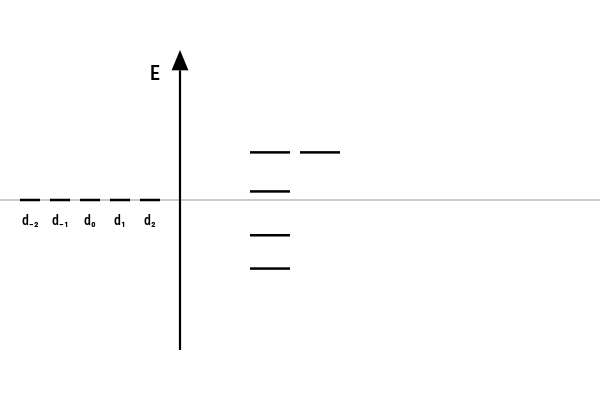

In [7]:
do_splitting(ligands_θ, ligands_ϕ, f0=0, f2=2, f4=1)

## Exercise 1:
- **Prepare a metal-ion in an octahedral field**
 - Determine the spherical coordinates of ligands in octahedral arrangement.
 - *Hint: Draw the definition of spherical coordinates*
- **Compute total Hamiltonian in matrix representation with d-orbitals as basis**
 - Discuss the meaning of Slater-Condon parameters in the matrix elements.
 - Can you disentagnle the shift of d-orbitals to higher energies and their splitting just from the total Hamiltonian?
- **Explore the effect of symmetry perturbation**
  - Make a small displacements of the ligand position to break the octahedral symmetry.
  - Compute again the total Hamiltonian and splitting of the d-orbitals.
  - Compare with the symmetric case and discuss the results.

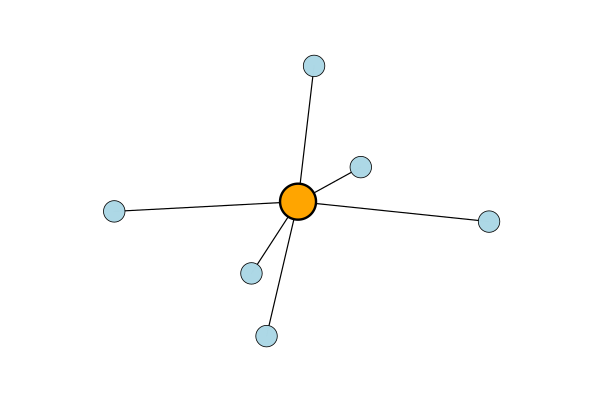

In [8]:
ligands_θ = [ pi/2, pi/2, pi/2, pi/2, 0, pi ] .+ rand(6)/pi;
ligands_ϕ = [ 0, pi/2, pi, 3*pi/2, 0, 0 ] .+ rand(6)/pi;

p = plot_ligs(ligands_θ, ligands_ϕ)

In [9]:
construct_Htot(ligands_θ, ligands_ϕ)

,d₋₂,d₋₁,d₀,d₁,d₂
,String,String,String,String,String
1,+ 6.00 F0 - 0.03 F2 + 0.14 F4,+ 0.07 F2 - 0.06 F4,- 0.04 F2 - 0.02 F4,- 0.09 F4,+ 0.52 F4
2,+ 0.07 F2 - 0.06 F4,+ 6.00 F0 + 0.02 F2 - 0.56 F4,+ 0.03 F2 + 0.16 F4,- 0.05 F2 + 0.03 F4,+ 0.09 F4
3,- 0.04 F2 - 0.02 F4,+ 0.03 F2 + 0.16 F4,+ 6.00 F0 + 0.03 F2 + 0.85 F4,- 0.03 F2 - 0.16 F4,- 0.04 F2 - 0.02 F4
4,- 0.09 F4,- 0.05 F2 + 0.03 F4,- 0.03 F2 - 0.16 F4,+ 6.00 F0 + 0.02 F2 - 0.56 F4,- 0.07 F2 + 0.06 F4
5,+ 0.52 F4,+ 0.09 F4,- 0.04 F2 - 0.02 F4,- 0.07 F2 + 0.06 F4,+ 6.00 F0 - 0.03 F2 + 0.14 F4


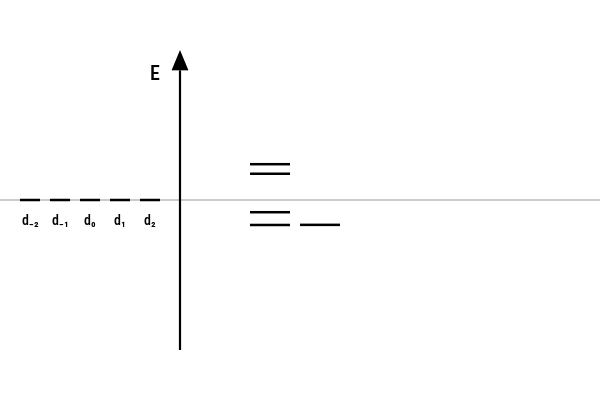

In [13]:
do_splitting(ligands_θ, ligands_ϕ, f0=0, f2=0.2, f4=1)